In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

import importlib
import sql

importlib.reload(sql)
from sql import show_tables, insert_tables, show_specific_tables, get_issuer

yf.pdr_override()

# For time stamps
from datetime import datetime

# The tech stocks we'll use for this analysis
row = get_issuer()[0]  # Call the get_issuer function
# row = 'BBNI.JK'

stock_data = [row]
# stock_data = ['CBUT']
print(stock_data)
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Create a dictionary to store the data
data = {}

for stock in stock_data:
    print(stock)
    data[stock] = yf.download(stock, start, end)

# Create a list of the dataframes
company_list = [data[stock] for stock in stock_data]
company_name = ["BNI"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BBNI.JK']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'www.yahoo.com\', port=443): Max retries exceeded with url: /?guccounter=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7fb50f661590>: Failed to resolve \'www.yahoo.com\' ([Errno -2] Name or service not known)"))'))


successfully get the data issuer!
['BBNI.JK']
BBNI.JK


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,


In [2]:
# Summary Stats
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,83.951793,84.842431,83.084383,83.976375,83.976375,1.656787e+06
std,7.255885,7.253861,7.227164,7.235494,7.235494,7.793814e+05
min,65.949997,66.250000,64.629997,65.760002,65.760002,3.370000e+05
25%,78.814999,79.555000,77.965000,78.799999,78.799999,1.199800e+06
50%,85.139999,85.900002,84.150002,85.139999,85.139999,1.460800e+06
75%,88.884998,89.889999,87.560001,88.430000,88.430000,1.869200e+06
max,98.290001,98.650002,97.180000,98.120003,98.120003,5.906900e+06


In [3]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-06-02 to 2024-05-31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


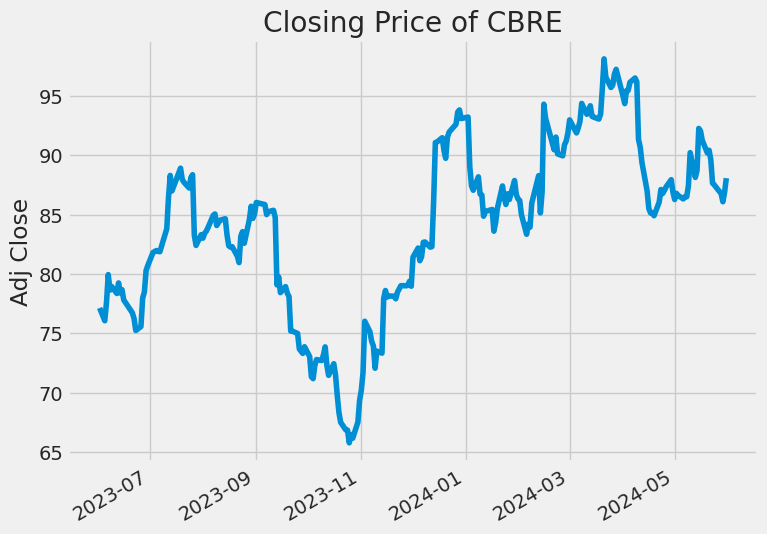

In [4]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock_data[i - 1]}")
    
plt.tight_layout()

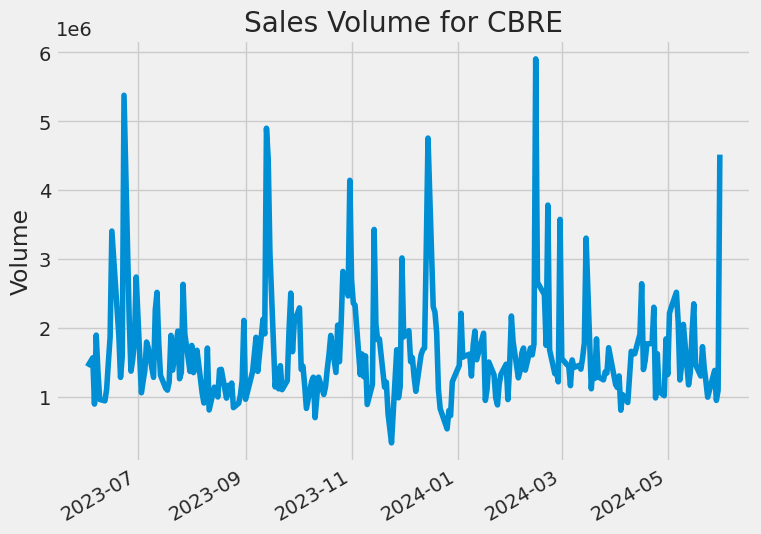

In [5]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stock_data[i - 1]}")
    
plt.tight_layout()

In [6]:
#6
# Get the stock quote
df = pdr.get_data_yahoo('CBRE.JK', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-09,144.0,145.0,144.0,145.0,145.0,65266100
2023-01-10,160.0,195.0,140.0,195.0,195.0,328134800
2023-01-11,202.0,242.0,182.0,182.0,182.0,448969700
2023-01-12,170.0,174.0,170.0,170.0,170.0,17100000
2023-01-13,159.0,171.0,159.0,159.0,159.0,113064400
...,...,...,...,...,...,...
2024-05-27,30.0,30.0,30.0,30.0,30.0,142700
2024-05-28,27.0,27.0,27.0,27.0,27.0,235800
2024-05-29,25.0,25.0,25.0,25.0,25.0,252000


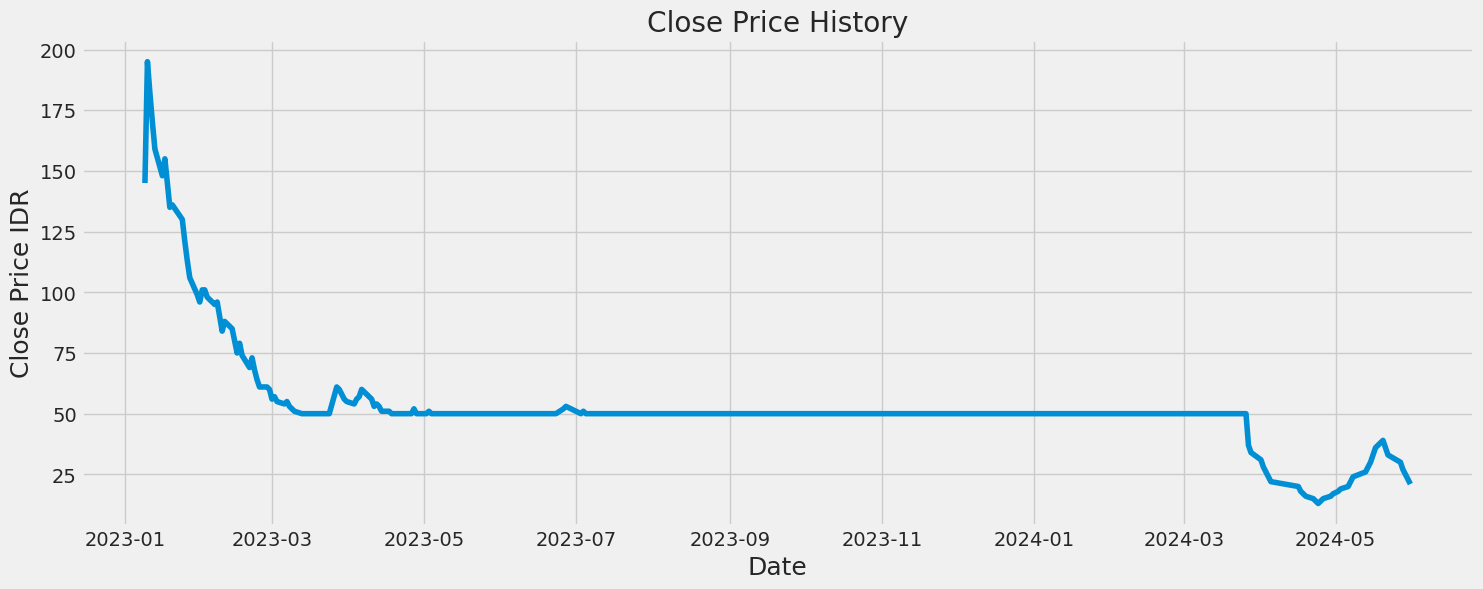

In [7]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR', fontsize=18)
plt.show()

In [8]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

310

In [9]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.72527473],
       [1.        ],
       [0.92857143],
       [0.86263736],
       [0.8021978 ],
       [0.74175824],
       [0.78021978],
       [0.72527473],
       [0.67032967],
       [0.67582418],
       [0.64285714],
       [0.59340659],
       [0.54945055],
       [0.51098901],
       [0.47252747],
       [0.45604396],
       [0.48351648],
       [0.48351648],
       [0.46703297],
       [0.45054945],
       [0.45604396],
       [0.42307692],
       [0.39010989],
       [0.41208791],
       [0.3956044 ],
       [0.36813187],
       [0.34065934],
       [0.36263736],
       [0.33516484],
       [0.30769231],
       [0.32967033],
       [0.3021978 ],
       [0.28021978],
       [0.26373626],
       [0.26373626],
       [0.25824176],
       [0.23626374],
       [0.24175824],
       [0.23076923],
       [0.22527473],
       [0.23076923],
       [0.21978022],
       [0.21428571],
       [0.20879121],
       [0.2032967 ],
       [0.2032967 ],
       [0.2032967 ],
       [0.203

In [10]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.72527473, 1.        , 0.92857143, 0.86263736, 0.8021978 ,
       0.74175824, 0.78021978, 0.72527473, 0.67032967, 0.67582418,
       0.64285714, 0.59340659, 0.54945055, 0.51098901, 0.47252747,
       0.45604396, 0.48351648, 0.48351648, 0.46703297, 0.45054945,
       0.45604396, 0.42307692, 0.39010989, 0.41208791, 0.3956044 ,
       0.36813187, 0.34065934, 0.36263736, 0.33516484, 0.30769231,
       0.32967033, 0.3021978 , 0.28021978, 0.26373626, 0.26373626,
       0.25824176, 0.23626374, 0.24175824, 0.23076923, 0.22527473,
       0.23076923, 0.21978022, 0.21428571, 0.20879121, 0.2032967 ,
       0.2032967 , 0.2032967 , 0.2032967 , 0.2032967 , 0.2032967 ,
       0.2032967 , 0.2032967 , 0.26373626, 0.25824176, 0.24725275,
       0.23626374, 0.23076923, 0.22527473, 0.23626374, 0.24175824])]
[0.25824175824175827]

[array([0.72527473, 1.        , 0.92857143, 0.86263736, 0.8021978 ,
       0.74175824, 0.78021978, 0.72527473, 0.67032967, 0.67582418,
       0.64285714, 0.59340659, 0.54

In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2024-06-02 21:36:41.227148: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-02 21:36:50.321968: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-06-02 21:36:55.178020: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-02 21:36:55.179233: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required li

250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - loss: 0.0029


In [12]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step


7.160235269643026

/tmp/ipykernel_103967/3462487869.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


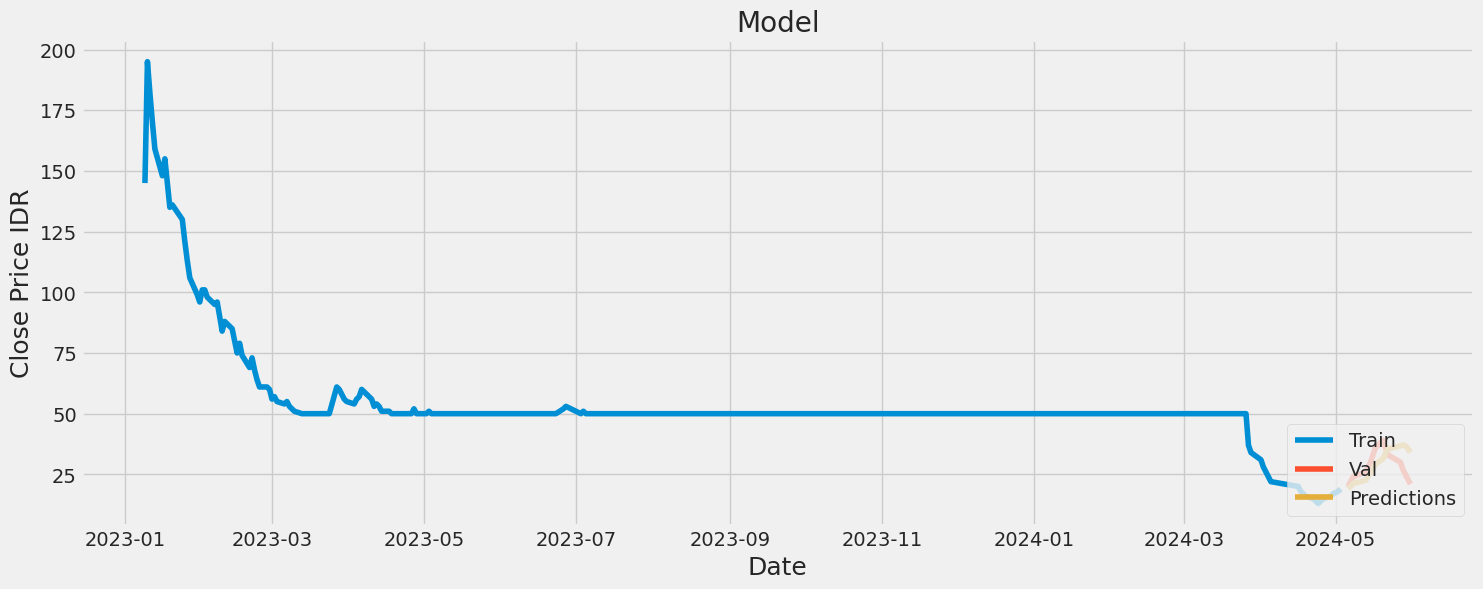

In [13]:
# Find the min and max values of 'Close' column in the first DataFrame
# y_min = df['Close'].min()
# y_max = df['Close'].max()

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

# Set the limits of the Y-axis to match the first plot
# plt.ylim(y_min, y_max)

plt.show()

In [14]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2024-05-06,20.0,19.082039
2024-05-07,22.0,20.068590
2024-05-08,24.0,21.228161
2024-05-13,26.0,22.563282
2024-05-14,28.0,24.058729
2024-05-15,30.0,25.688442
2024-05-16,33.0,27.421545
2024-05-17,36.0,29.309122
2024-05-20,39.0,31.370871


In [15]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(valid['Close'], valid['Predictions'])
print(f'Mean Absolute Percentage Error (MAPE): {mape} %')

Mean Absolute Percentage Error (MAPE): 22.492934840257288 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step

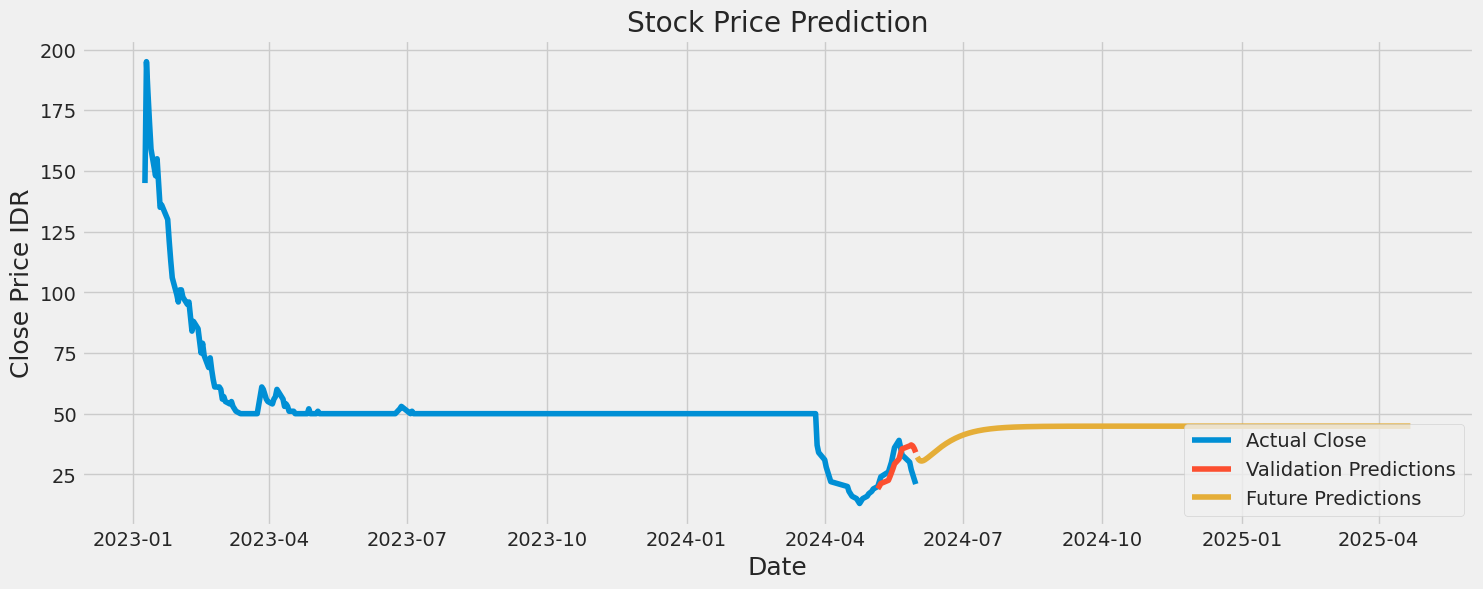

In [16]:
def predict(num_days):
    """
    This function takes the number of days to predict as input and returns 
    the predicted closing prices for those days.
    """
    # Get the last 60 days of data from the existing dataframe
    last_days_data = valid[-60:]
    last_days_data = last_days_data.values.reshape(-1, 1)

    # Predict for num_days using the trained model
    predicted_prices = []
    for i in range(num_days):
        prediction = model.predict(last_days_data)
        predicted_prices.append(prediction[0][0])
        # Update last_days_data by adding the predicted value
        last_days_data = np.append(last_days_data[1:], prediction, axis=0)

    # Invert scaling for the predicted prices
    predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

    return predicted_prices

# Get the number of days to predict from the user (assuming user input)
num_days_to_predict = int(input("Enter the number of days to predict: "))

# Get the predicted closing prices
predicted_prices = predict(num_days_to_predict)

# Create a DataFrame for the predicted data
predicted_df = pd.DataFrame({
    "Date": pd.date_range(start=valid.index[-1] + pd.DateOffset(days=1), periods=num_days_to_predict),
    "Predicted Price": predicted_prices
})

# Combine the valid data and predicted data
combined_df = pd.concat([valid, predicted_df], ignore_index=True)

# Plot the data with predicted values
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR', fontsize=18)
plt.plot(combined_df['Close'])
plt.plot(combined_df['Predictions'])
plt.plot(combined_df[combined_df.index >= len(valid)]['Predicted Price'])  # Plot predicted prices from here
plt.legend(['Train', 'Val', 'Predictions', 'Predicted'], loc='lower right')
plt.show()

[*********************100%%**********************]  1 of 1 completed


              Open         High          Low        Close    Adj Close  \
count   234.000000   234.000000   234.000000   234.000000   234.000000   
mean   2157.478632  2237.200855  2077.799145  2162.948718  2146.976860   
std     656.835019   672.302084   635.179984   659.582438   653.605023   
min    1055.000000  1055.000000  1035.000000  1045.000000  1045.000000   
25%    1755.000000  1836.250000  1661.250000  1765.000000  1751.480591   
50%    1990.000000  2080.000000  1950.000000  2000.000000  1984.680542   
75%    2685.000000  2717.500000  2552.500000  2690.000000  2669.395264   
max    3900.000000  4000.000000  3500.000000  3880.000000  3850.280273   

              Volume  
count     234.000000  
mean    50056.837607  
std    102952.733729  
min         0.000000  
25%      5000.000000  
50%     12500.000000  
75%     41400.000000  
max    924700.000000  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 234 entries, 2023-06-05 to 2024-05-31
Data columns (total 7 columns):
 # 

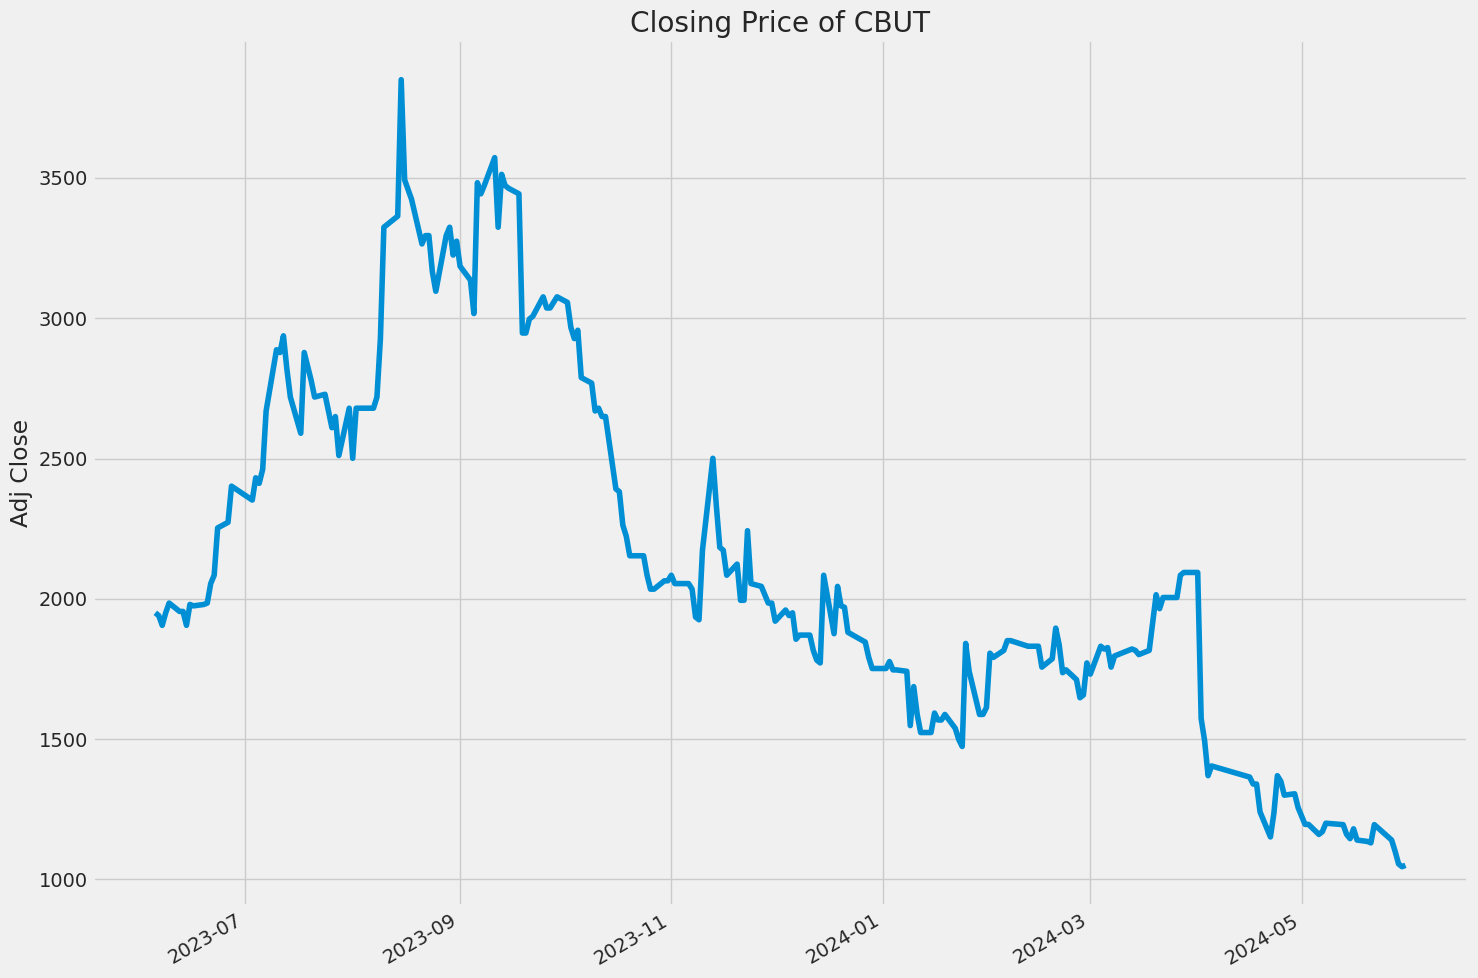

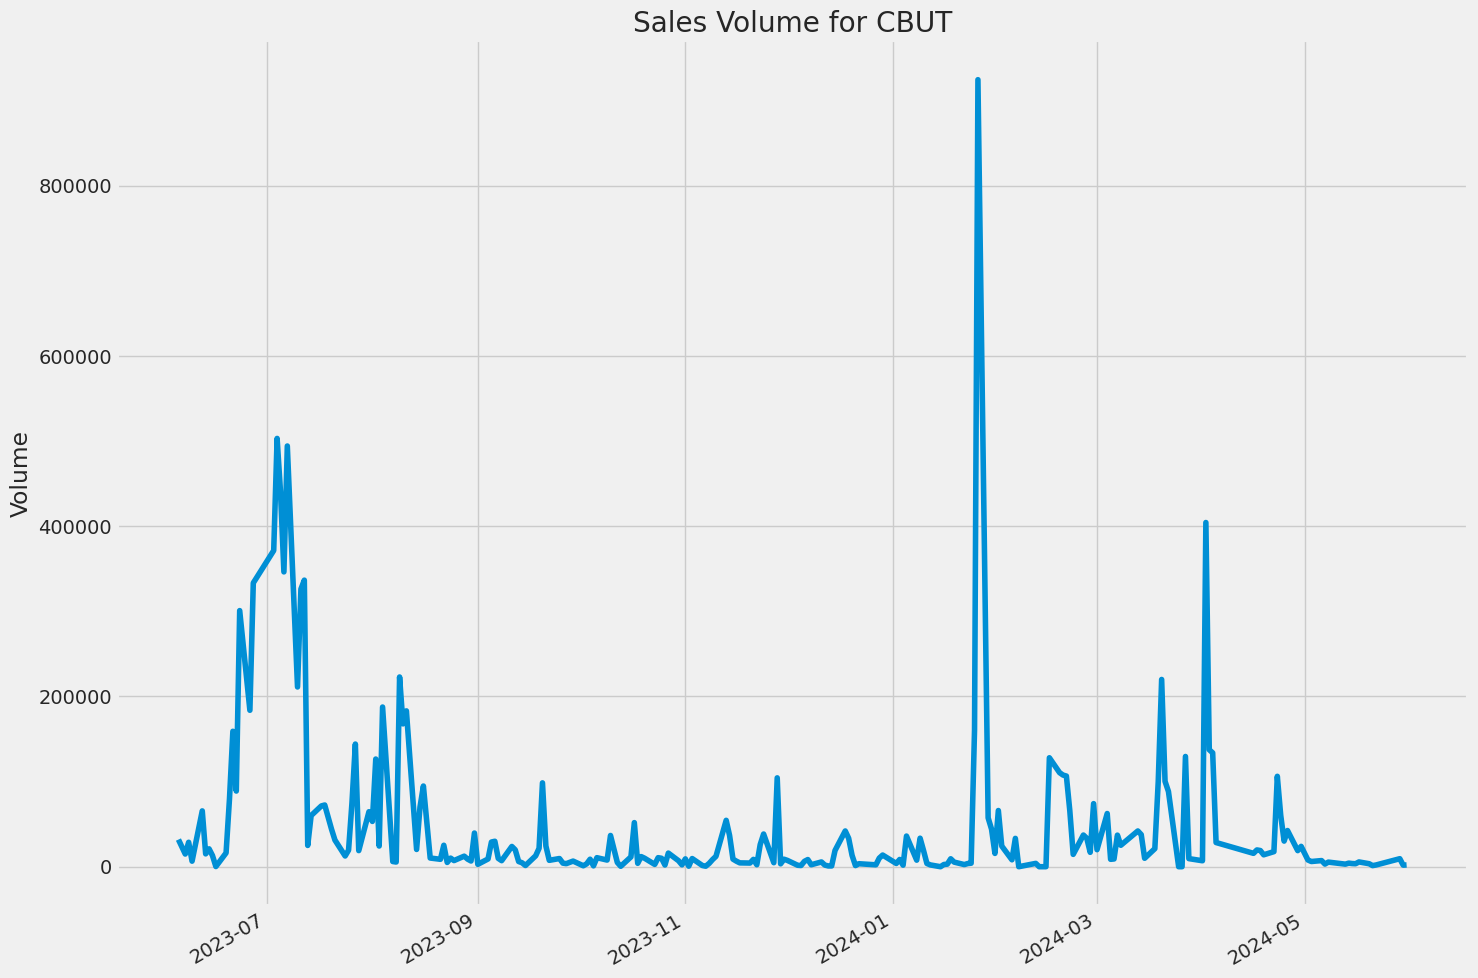

[*********************100%%**********************]  1 of 1 completed


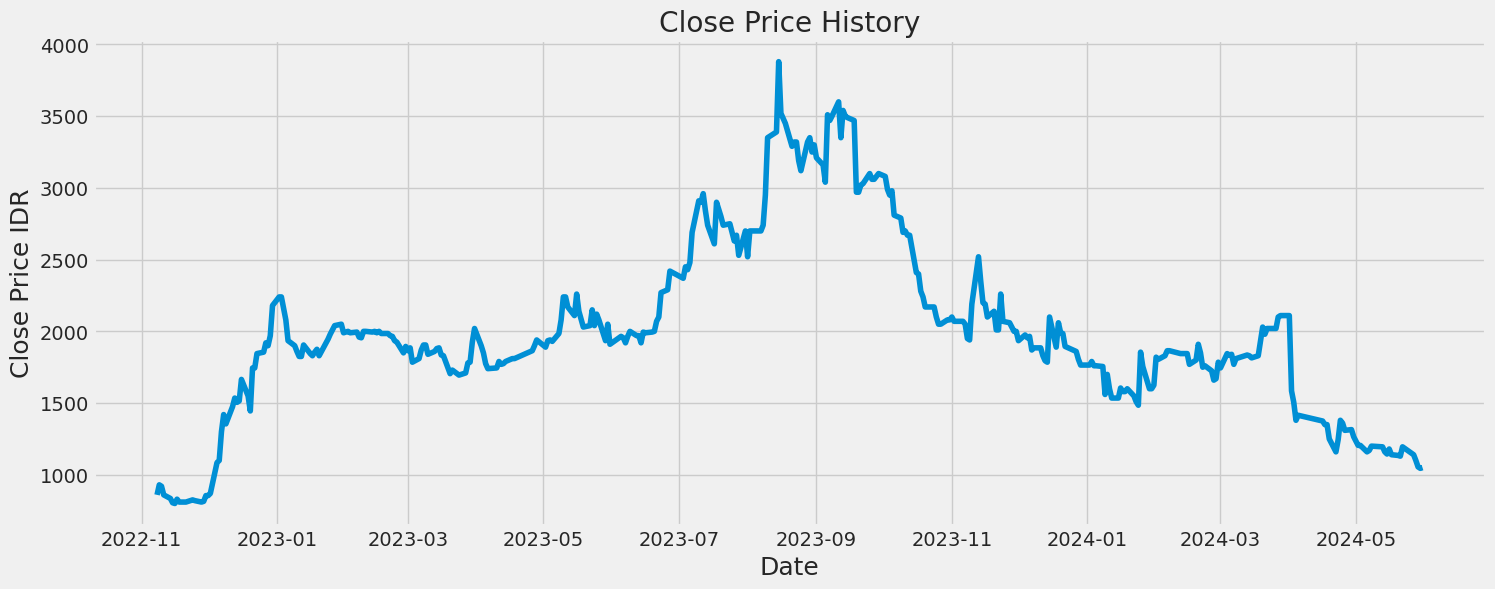

IndexError: tuple index out of range

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

from datetime import datetime, timedelta

# Stock data
stock_data = ['CBUT.JK']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

data = {}

for stock in stock_data:
    data[stock] = yf.download(stock, start, end)

company_list = [data[stock] for stock in stock_data]
company_name = ["CBUT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)

# Summary Stats and General Info
print(df.describe())
print(df.info())

# Historical closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(1, 1, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")

plt.tight_layout()
plt.show()  # Ensure plots are displayed

# Total volume of stock traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(1, 1, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name[i - 1]}")

plt.tight_layout()
plt.show()  # Ensure plots are displayed

# Get the stock quote
df = pdr.get_data_yahoo('CBUT.JK', start='2022-05-01', end=end)

plt.figure(figsize=(16, 6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR', fontsize=18)
plt.show()

data = df.filter(['Close'])
dataset = data.values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Split data into training and testing sets
train_data = scaled_data[:-365]
test_data = scaled_data[-365-60:]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

x_test = []
y_test = scaled_data[-365:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Generate dates for the next year
future_dates = pd.date_range(end + timedelta(days=1), periods=365, freq='D')

plt.figure(figsize=(16, 6))
plt.title('Predicted Close Price for the Next Year')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR', fontsize=18)
plt.plot(future_dates, predictions)
plt.savefig(f'/home/mahaputra971/ProjectLSTM/prediksi-saham-lstm/picture/prediction_{stock}.png')
plt.show()

In [2]:
plt.savefig(f'/home/mahaputra971/ProjectLSTM/prediksi-saham-lstm/picture/prediction_{stock}.png') 

<Figure size 640x480 with 0 Axes>

In [21]:
predicted_data = pd.DataFrame({'Date': future_dates, 'Predicted Close Price': predictions.flatten()})
print(predicted_data)

# Save the plot as a picture
plt.figure(figsize=(16, 6))
# plt.title('Predicted Close Price for the Next Year')
# plt.xlabel('Date', fontsize=18)
# plt.ylabel('Close Price IDR', fontsize=18)
# plt.plot(future_dates, predictions)
# plt.savefig('/home/mahaputra971/ProjectLSTM/prediksi-saham-lstm/picture/prediction_{stock}.png')
# plt.show()



                          Date  Predicted Close Price
0   2024-05-17 18:27:44.671899            3904.485107
1   2024-05-18 18:27:44.671899            3836.398193
2   2024-05-19 18:27:44.671899            3802.282959
3   2024-05-20 18:27:44.671899            3791.015381
4   2024-05-21 18:27:44.671899            3822.544678
..                         ...                    ...
360 2025-05-12 18:27:44.671899            2819.415527
361 2025-05-13 18:27:44.671899            2848.195068
362 2025-05-14 18:27:44.671899            2895.906982
363 2025-05-15 18:27:44.671899            2900.867188
364 2025-05-16 18:27:44.671899            2874.485352

[365 rows x 2 columns]


In [25]:
# Find the index of the highest and lowest predicted prices
highest_price_index = predicted_data['Predicted Close Price'].idxmax()
lowest_price_index = predicted_data['Predicted Close Price'].idxmin()

# Get the highest and lowest predicted prices
highest_price = predicted_data.loc[highest_price_index, 'Predicted Close Price']
lowest_price = predicted_data.loc[lowest_price_index, 'Predicted Close Price']

# Get the corresponding dates for the highest and lowest prices
highest_price_date = predicted_data.loc[highest_price_index, 'Date']
lowest_price_date = predicted_data.loc[lowest_price_index, 'Date']

# Display the highest and lowest prices and their corresponding dates
print("Highest Predicted Price:", highest_price)
print("Date of Highest Price:", highest_price_date)
print("Lowest Predicted Price:", lowest_price)
print("Date of Lowest Price:", lowest_price_date)

Highest Predicted Price: 3949.1504
Date of Highest Price: 2024-06-21 18:27:44.671899
Lowest Predicted Price: 2142.3186
Date of Lowest Price: 2024-10-04 18:27:44.671899


In [2]:
import importlib
import sql

importlib.reload(sql)
from sql import show_tables, insert_tables, show_specific_tables, get_issuer
result = show_specific_tables("tb_emiten")
print(result)

Table displayed successfully!!!!!!!!!!!!!!!!!
[(1, 'BREN.JK'), (2, 'BBCA.JK'), (3, 'TPIA.JK'), (4, 'AMMN.JK'), (5, 'BBRI.JK'), (6, 'BYAN.JK'), (7, 'BMRI.JK'), (8, 'TLKM.JK'), (9, 'ASII.JK'), (10, 'BBNI.JK'), (11, 'ICBP.JK'), (12, 'DSSA.JK'), (13, 'BRPT.JK'), (14, 'AMRT.JK'), (15, 'UNVR.JK'), (16, 'BRIS.JK'), (17, 'SMMA.JK'), (18, 'CUAN.JK'), (19, 'HMSP.JK'), (20, 'DCII.JK'), (21, 'ADRO.JK'), (22, 'PANI.JK'), (23, 'CPIN.JK'), (24, 'ISAT.JK'), (25, 'UNTR.JK'), (26, 'MBMA.JK'), (27, 'KLBF.JK'), (28, 'GOTO.JK'), (29, 'MDKA.JK'), (30, 'DNET.JK'), (31, 'NCKL.JK'), (32, 'MEGA.JK'), (33, 'BELI.JK'), (34, 'ADMR.JK'), (35, 'INDF.JK'), (36, 'PGEO.JK'), (37, 'INKP.JK'), (38, 'MYOR.JK'), (39, 'INCO.JK'), (40, 'MASA.JK'), (41, 'MTEL.JK'), (42, 'BNGA.JK'), (43, 'MIKA.JK'), (44, 'FILM.JK'), (45, 'TBIG.JK'), (46, 'CMRY.JK'), (47, 'PGAS.JK'), (48, 'ANTM.JK'), (49, 'TOWR.JK'), (50, 'GGRM.JK'), (51, 'GEMS.JK'), (52, 'TCPI.JK'), (53, 'JSMR.JK'), (54, 'MEDC.JK'), (55, 'MSIN.JK'), (56, 'BUMI.JK'), (57, 'SILO

In [5]:
# row = show_specific_tables("tb_emiten")
row = get_issuer()
print(row[1])
ro1 = row[1] 
print(ro1)
i = 0
j = 100
for r in range(j):
    listrow = row[i]
    print(listrow)
    # print(type(listrow))
    i = i + 1

successfully get the data issuer!
BBCA.JK
BBCA.JK
BREN.JK
BBCA.JK
TPIA.JK
AMMN.JK
BBRI.JK
BYAN.JK
BMRI.JK
TLKM.JK
ASII.JK
BBNI.JK
ICBP.JK
DSSA.JK
BRPT.JK
AMRT.JK
UNVR.JK
BRIS.JK
SMMA.JK
CUAN.JK
HMSP.JK
DCII.JK
ADRO.JK
PANI.JK
CPIN.JK
ISAT.JK
UNTR.JK
MBMA.JK
KLBF.JK
GOTO.JK
MDKA.JK
DNET.JK
NCKL.JK
MEGA.JK
BELI.JK
ADMR.JK
INDF.JK
PGEO.JK
INKP.JK
MYOR.JK
INCO.JK
MASA.JK
MTEL.JK
BNGA.JK
MIKA.JK
FILM.JK
TBIG.JK
CMRY.JK
PGAS.JK
ANTM.JK
TOWR.JK
GGRM.JK
GEMS.JK
TCPI.JK
JSMR.JK
MEDC.JK
MSIN.JK
BUMI.JK
SILO.JK
BNLI.JK
ARTO.JK
EXCL.JK
AKRA.JK
AVIA.JK
PTBA.JK
NISP.JK
TKIM.JK
ITMG.JK
CASA.JK
EMTK.JK
SMGR.JK
PNBN.JK
BDMN.JK
BTPN.JK
MKPI.JK
BINA.JK
INTP.JK
MAPI.JK
MAPA.JK
BRMS.JK
SRTG.JK
CTRA.JK
SIDO.JK
IMPC.JK
BSDE.JK
HEAL.JK
BBHI.JK
ULTJ.JK
FAPA.JK
PWON.JK
MCOL.JK
CMNT.JK
HRUM.JK
BNII.JK
CNMA.JK
BBTN.JK
BSIM.JK
FREN.JK
MPRO.JK
BFIN.JK
GOOD.JK
ESSA.JK
